In [1]:
%config IPCompleter.greedy=True

# Wybór metody resamplingu

## Pobranie danych z pliku

In [2]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')

## Wydzielenie zbiorów

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Inicjacja struktur danych do testów


In [4]:
scores = []
methods = []

## Wybór metody

### SMOTE

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

random_forest = make_pipeline(StandardScaler(), RandomForestClassifier())
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores.append(cm[1,0])
methods.append("SMOTE")

Using TensorFlow backend.
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## ADASYN

In [6]:
from imblearn.over_sampling import ADASYN
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X_train, Y_train = ADASYN().fit_resample(X_train, Y_train)

random_forest = make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores.append(cm[1,0])
methods.append("ADASYN")

## Smote + Tomek

In [7]:
from imblearn.combine import SMOTETomek
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X_train, Y_train = SMOTETomek().fit_resample(X_train, Y_train)

random_forest = make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test))
scores.append(cm[1,0])
methods.append("Smote + Tomek")

## Wyniki

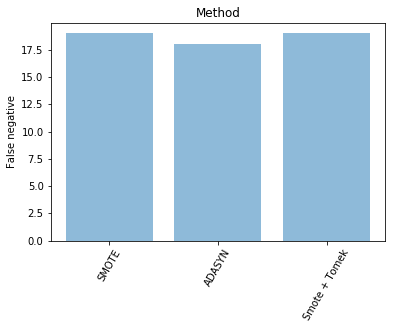

In [9]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False negative')
plt.title('Method')

plt.show()